In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
img = image.load_img(r'C:\Users\HP\Desktop\CNN-Happy or Sad\testing\IMG_2949.JPG')

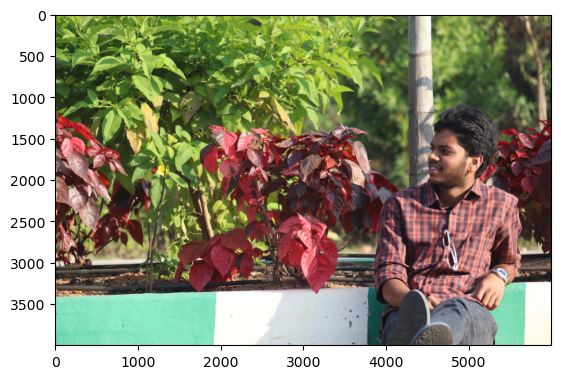

In [3]:
plt.imshow(img)

In [4]:
i1 = cv2  .imread(r'C:\Users\HP\Desktop\CNN-Happy or Sad\testing\IMG_2949.JPG')
i1

array([[[ 32, 173, 146],
        [ 33, 176, 149],
        [ 35, 181, 151],
        ...,
        [ 92, 133, 128],
        [ 91, 133, 126],
        [ 90, 132, 125]],

       [[ 35, 177, 148],
        [ 35, 177, 148],
        [ 32, 178, 148],
        ...,
        [ 92, 133, 128],
        [ 92, 134, 127],
        [ 91, 133, 126]],

       [[ 37, 177, 148],
        [ 37, 179, 150],
        [ 36, 180, 151],
        ...,
        [ 94, 136, 129],
        [ 93, 135, 128],
        [ 93, 135, 128]],

       ...,

       [[177, 215, 119],
        [177, 215, 119],
        [172, 213, 115],
        ...,
        [238, 253, 255],
        [239, 251, 255],
        [238, 250, 254]],

       [[177, 216, 118],
        [177, 216, 118],
        [174, 215, 117],
        ...,
        [237, 252, 255],
        [237, 252, 255],
        [236, 251, 254]],

       [[176, 215, 117],
        [178, 217, 119],
        [173, 214, 116],
        ...,
        [238, 253, 255],
        [238, 253, 255],
        [238, 253, 255]]

In [5]:
i1.shape

(4000, 6000, 3)

In [6]:
train = ImageDataGenerator(rescale=1/200)
validation = ImageDataGenerator(rescale=1/200) # you can give 255. no issues

In [7]:
train_dataset  = train.flow_from_directory(r'C:\Users\HP\Desktop\CNN-Happy or Sad\training', target_size=(200,200), batch_size = 32, class_mode = 'binary')
validation_dataset  = train.flow_from_directory(r'C:\Users\HP\Desktop\CNN-Happy or Sad\validation', target_size=(200,200), batch_size = 32, class_mode = 'binary')

Found 12 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [10]:
# applying maxpooling
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation='sigmoid') # we used sigmoid cause we have 2 happy and sad
]) # sigmoid is a multiple binary classification

c:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [12]:
model_fit = model.fit(train_dataset, epochs = 10)

c:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.6939
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5833 - loss: 9.7657
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4167 - loss: 2.7719
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4167 - loss: 0.6993
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5833 - loss: 0.5904
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5833 - loss: 0.5350
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.4566
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5833 - loss: 0.5446
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4167 - loss: 0.8406
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5833 - loss: 0.5231


In [13]:
''' dir_path = r"C:\Users\HP\Desktop\CNN-Happy or Sad\testing"

for i in os.listdir(dir_path):
  print(i) '''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 16-17: truncated \UXXXXXXXX escape (1872106058.py, line 1)

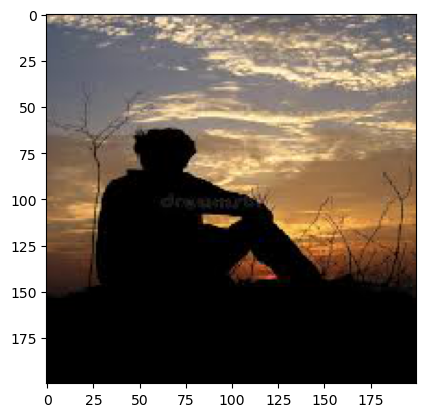

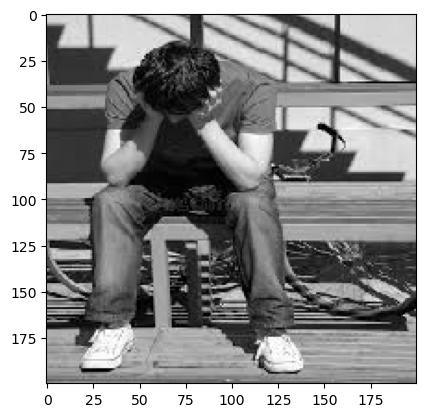

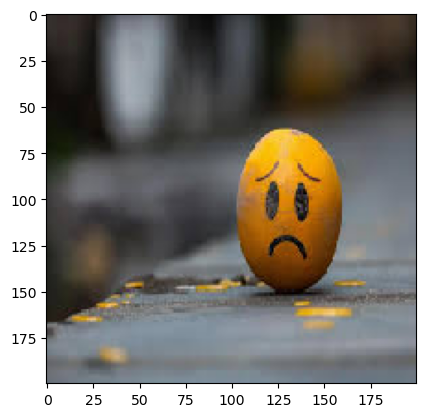

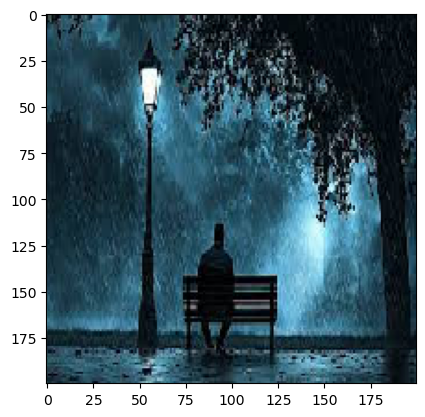

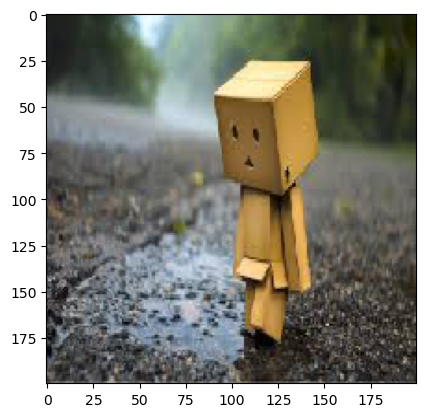

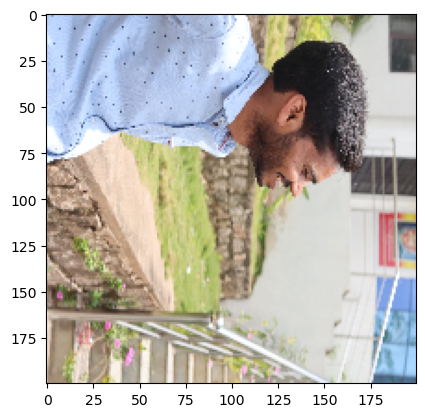

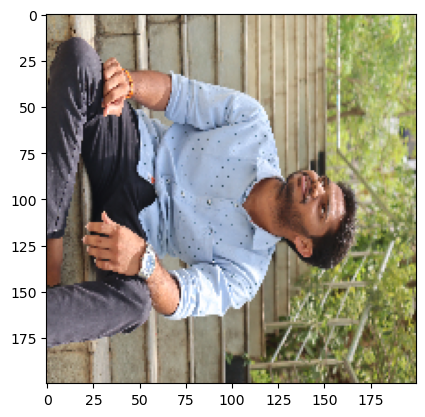

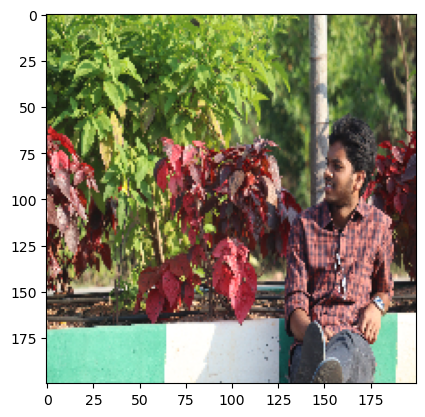

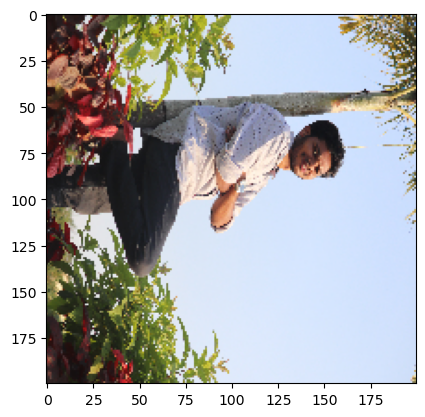

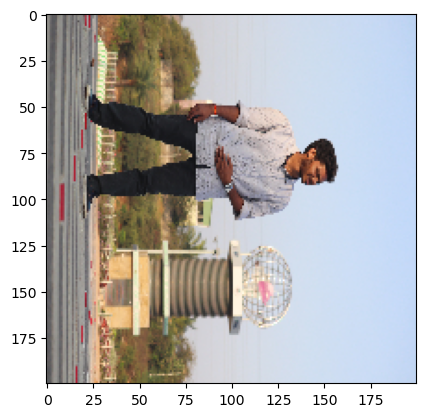

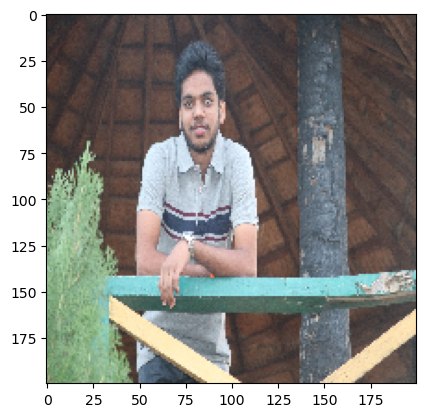

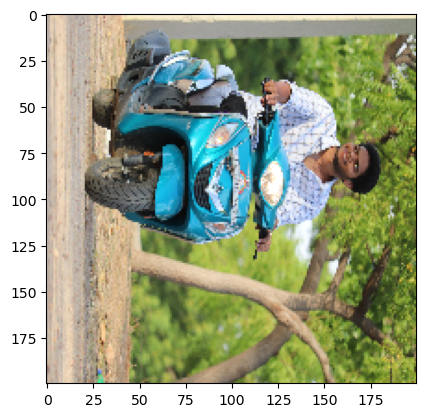

In [ ]:
''' dir_path = r"C:\Users\HP\Desktop\CNN-Happy or Sad\testing"

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show() '''

In [ ]:
!nvidia-smi

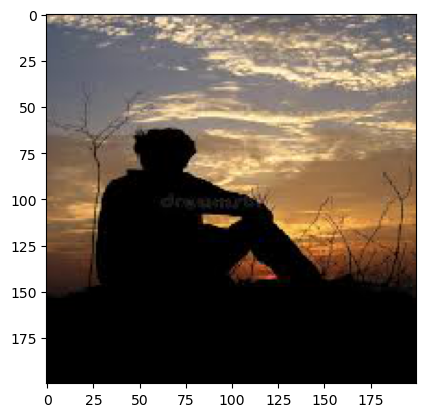

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
sad


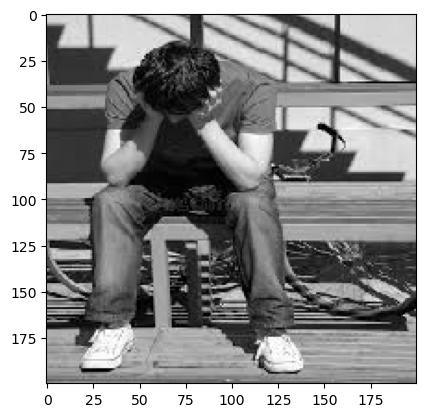

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
sad


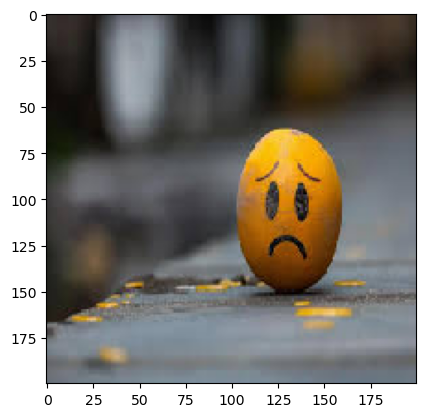

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
sad


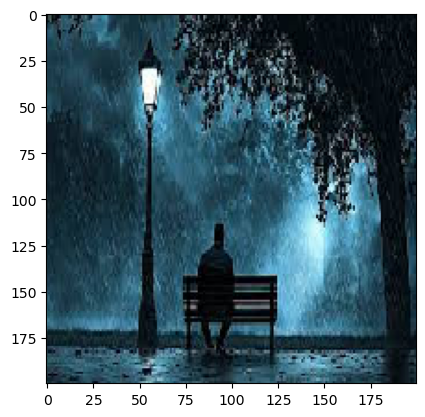

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
sad


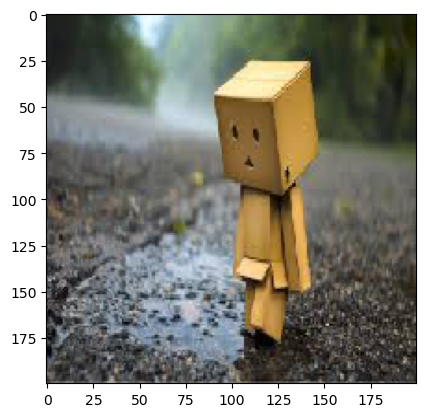

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
sad


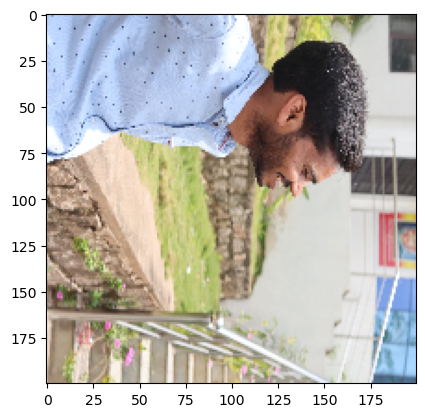

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Happy


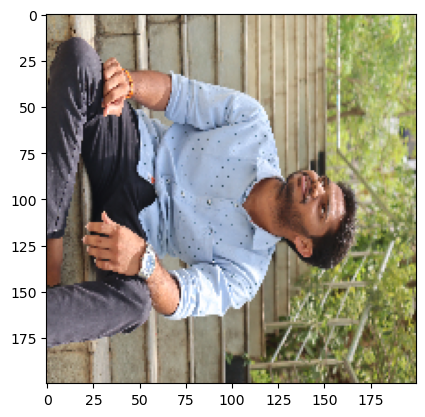

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Happy


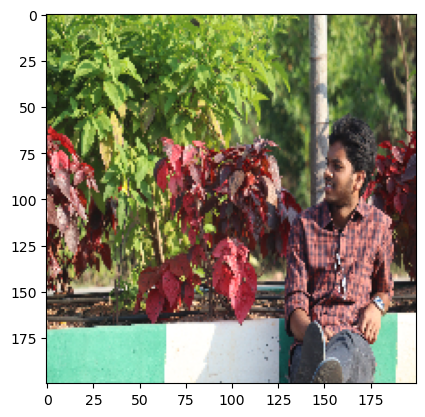

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Happy


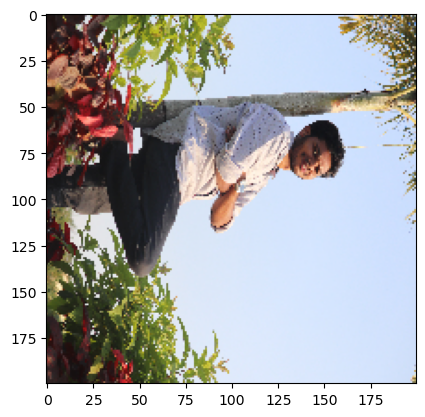

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Happy


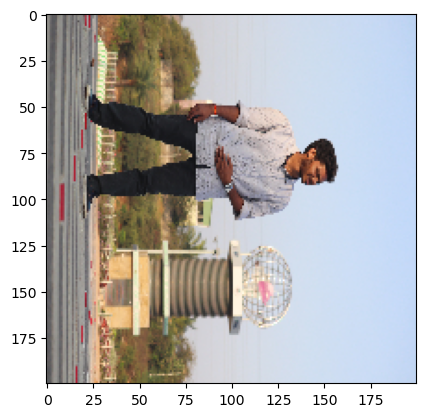

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Happy


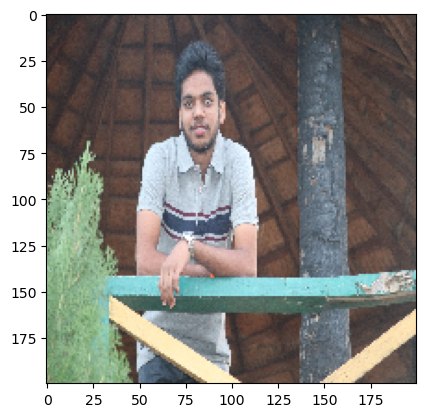

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Happy


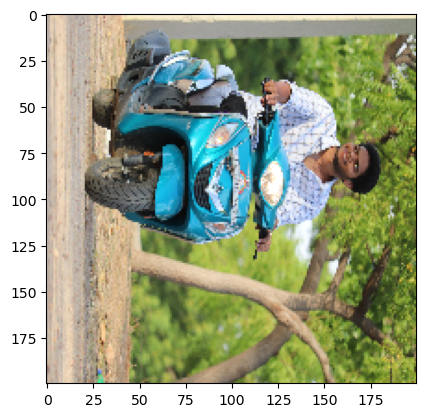

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Happy


In [ ]:
dir_path = r"C:\Users\HP\Desktop\CNN-Happy or Sad\testing"

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])

  val = model.predict(images)
  if val == 0:
    print('Happy')
  else:
    print('sad')

In [ ]:
!nvidia-smi

In [14]:
model.save('MoodCrafter_AI.h5')